

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [73]:
from IPython.display import IFrame # import iFrame

# Google Sheet embed link (make sure to replace with your own Google Sheet link)
google_sheet_url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en&gid=1#gid=1"
# Display the Google Sheet using an iframe
IFrame(src=google_sheet_url, width=800, height=400)


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [32]:
# your code here
# use many cells if you like to structure your code well

#a
import pandas as pd    # This is the workhorse of data munging in Python
f = 'data/Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv'
db = pd.read_csv(f)    # Read the table in

db.columns = db. iloc[0] # make the first row the header

db = db.drop(db.index[0]) # delete the first row as it was the header

db = db.reset_index(drop=True)

#b
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004,January,15,51,23,NaN,11
1,2004,February,NaN,7,4,5,2
2,2004,March,19,2,NaN,2,3
3,2004,April,5,3,19,NaN,3
4,2004,May,18,29,56,6,9


In [33]:
#c
keys = db.columns.tolist()
values = db.iloc[0].tolist()

dictonary = dict(zip(keys, values))

print(dictonary)

{'Year': '2004', 'Month': 'January', 'Taliban': '15', 'Civilians': '51', 'Afghan forces': '23', 'Nato (detailed in spreadsheet)': nan, 'Nato - official figures': '11'}


## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

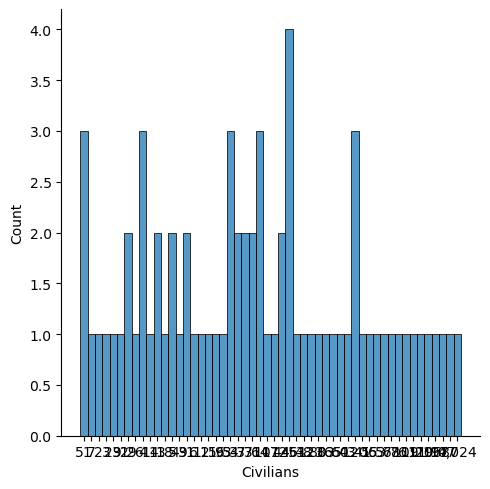

In [35]:
# your code here
# use many cells if you like to structure your code well

import seaborn as sns

_ = sns.displot(db['Civilians'], kde=False)

In [41]:
db.info() # to check which datatype we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            72 non-null     object
 1   Month                           73 non-null     object
 2   Taliban                         72 non-null     object
 3   Civilians                       73 non-null     object
 4   Afghan forces                   71 non-null     object
 5   Nato (detailed in spreadsheet)  67 non-null     object
 6   Nato - official figures         72 non-null     object
dtypes: object(7)
memory usage: 4.1+ KB


In [ ]:
# we removed the commas of the numbers higher than 1000 with the following code db['Taliban'] = db['Taliban'].str.replace(',','').astype(float) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            72 non-null     object 
 1   Month                           73 non-null     object 
 2   Taliban                         72 non-null     float64
 3   Civilians                       73 non-null     object 
 4   Afghan forces                   71 non-null     object 
 5   Nato (detailed in spreadsheet)  67 non-null     object 
 6   Nato - official figures         72 non-null     object 
dtypes: float64(1), object(6)
memory usage: 4.1+ KB


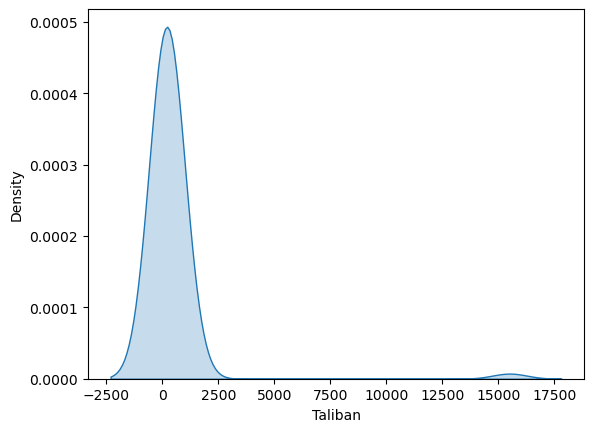

In [53]:
db['Taliban'] = pd.to_numeric(db['Taliban']) # change the datatype
db.info() # check the datatype

_ = sns.kdeplot(db['Taliban'], fill=True)

In [71]:
# c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

db.info() # check the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Year                            72 non-null     float64 
 1   Month                           73 non-null     category
 2   Taliban                         72 non-null     float64 
 3   Civilians                       73 non-null     object  
 4   Afghan forces                   71 non-null     object  
 5   Nato (detailed in spreadsheet)  67 non-null     object  
 6   Nato - official figures         72 non-null     object  
dtypes: category(1), float64(2), object(4)
memory usage: 4.3+ KB


In [78]:
db_2004 = db[db['Year'] == 2004]

print(db_2004) # check how the table looks like

0     Year      Month  Taliban Civilians Afghan forces  \
0   2004.0    January     15.0        51            23   
1   2004.0   February      NaN         7             4   
2   2004.0      March     19.0         2           NaN   
3   2004.0      April      5.0         3            19   
4   2004.0        May     18.0        29            56   
5   2004.0       June    163.0        32            14   
6   2004.0       July     21.0        19            19   
7   2004.0     August     20.0        26            10   
8   2004.0  September     33.0         4            16   
9   2004.0    October     13.0        14            14   
10  2004.0   November     21.0        19            36   
11  2004.0   December     15.0        13             7   

0  Nato (detailed in spreadsheet) Nato - official figures  
0                             NaN                      11  
1                               5                       2  
2                               2                       3  
3    

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [96]:
db['Civilians'] = db['Civilians'].str.replace(',','').astype(float) # to get rid of the comma

df = pd.DataFrame(db)

for value in df['Civilians']:
    print(value)

51.0
7.0
2.0
3.0
29.0
32.0
19.0
26.0
4.0
14.0
19.0
13.0
4.0
4.0
18.0
5.0
49.0
31.0
5.0
6.0
12.0
15.0
13.0
16.0
93.0
54.0
37.0
33.0
54.0
71.0
64.0
101.0
172.0
44.0
46.0
51.0
53.0
33.0
48.0
123.0
71.0
80.0
83.0
65.0
64.0
46.0
60.0
37.0
43.0
120.0
41.0
55.0
54.0
51.0
120.0
46.0
63.0
56.0
78.0
76.0
31.0
46.0
64.0
44.0
109.0
111.0
119.0
206.0
197.0
107.0
120.0
87.0
4024.0


In [98]:
filtered_df = df[df['Civilians']>10]

for value in filtered_df['Civilians']:
    print(value)

51.0
29.0
32.0
19.0
26.0
14.0
19.0
13.0
18.0
49.0
31.0
12.0
15.0
13.0
16.0
93.0
54.0
37.0
33.0
54.0
71.0
64.0
101.0
172.0
44.0
46.0
51.0
53.0
33.0
48.0
123.0
71.0
80.0
83.0
65.0
64.0
46.0
60.0
37.0
43.0
120.0
41.0
55.0
54.0
51.0
120.0
46.0
63.0
56.0
78.0
76.0
31.0
46.0
64.0
44.0
109.0
111.0
119.0
206.0
197.0
107.0
120.0
87.0
4024.0


## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [105]:
# a 
list = ["Civilians", "Afghan forces"]

#b
df2 = df[list + ["Month","Year"]]

print(df2)

0   Civilians Afghan forces      Month    Year
0        51.0            23    January  2004.0
1         7.0             4   February  2004.0
2         2.0           NaN      March  2004.0
3         3.0            19      April  2004.0
4        29.0            56        May  2004.0
..        ...           ...        ...     ...
68      197.0           133  September  2009.0
69      107.0            86    October  2009.0
70      120.0            69   November  2009.0
71       87.0            65   December  2009.0
72     4024.0         3,820      24498     NaN

[73 rows x 4 columns]


In [116]:
#c
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Civilians      73 non-null     float64 
 1   Afghan forces  71 non-null     float64 
 2   Month          73 non-null     category
 3   Year           72 non-null     float64 
dtypes: category(1), float64(3)
memory usage: 2.6 KB


In [127]:
db['casualties'] = df2['Civilians']+df2['Afghan forces']
print(df2)

0   Civilians  Afghan forces      Month    Year  casualties        Month_Year
0        51.0           23.0    January  2004.0        74.0    2004.0 January
1         7.0            4.0   February  2004.0        11.0   2004.0 February
2         2.0            NaN      March  2004.0         NaN      2004.0 March
3         3.0           19.0      April  2004.0        22.0      2004.0 April
4        29.0           56.0        May  2004.0        85.0        2004.0 May
..        ...            ...        ...     ...         ...               ...
68      197.0          133.0  September  2009.0       330.0  2009.0 September
69      107.0           86.0    October  2009.0       193.0    2009.0 October
70      120.0           69.0   November  2009.0       189.0   2009.0 November
71       87.0           65.0   December  2009.0       152.0   2009.0 December
72     4024.0         3820.0      24498     NaN      7844.0         nan 24498

[73 rows x 6 columns]


In [128]:
db['Month'] = db['Month'].astype(str)
db['Year'] = db['Year'].astype(str)

db['Month_Year']=db['Year']+' '+db['Month']

<Axes: xlabel='Month_Year', ylabel='casualties'>

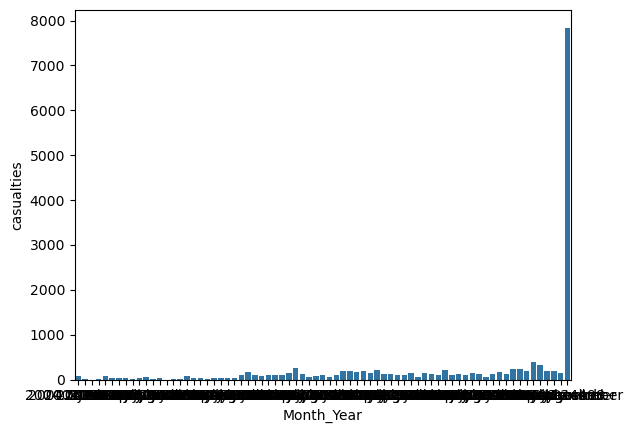

In [129]:
sns.barplot(x='Month_Year',y='casualties',data=df2)

<Axes: xlabel='Month_Year', ylabel='casualties'>

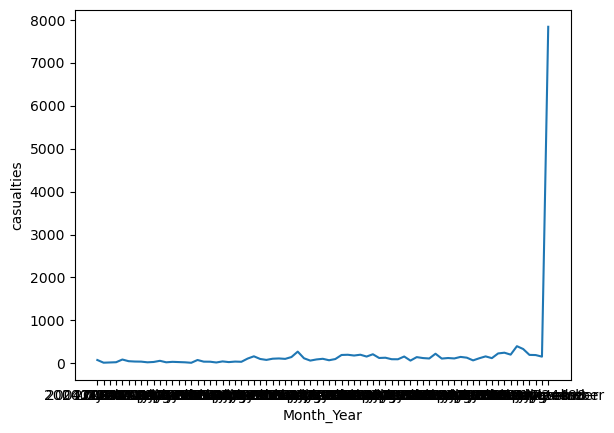

In [130]:
sns.lineplot(x='Month_Year',y='casualties',data=df2)